For the file titled "Lie Detector Regression Analysis," my primary objective is to leverage regression analysis techniques to identify patterns and predict outcomes related to the lie detector test data. Given the nature of the tasks outlined in the script you shared, here's a detailed and refined objective:

### Objective for the "Lie Detector Regression Analysis" File

**Objective:** Develop a robust regression model to predict the outcomes of a lie detector test based on various predictors such as participant demographics and test scores. This analysis aims to:
- **Understand Relationships:** Determine how different variables such as `grand_total` scores and other categorical factors like `gender` influence the outcomes (`fraud_alert`) of the lie detector test.
- **Predictive Accuracy:** Enhance the accuracy of predicting whether participants are likely to have a 'Good' or 'Bad' outcome based on their test scores and other associated factors.
- **Model Optimization:** Utilize various regression techniques including Ordinary Least Squares (OLS) and logistic regression to model these relationships. Optimize these models by evaluating their performance through statistical measures such as R-squared, residuals, and visual diagnostics like residual plots and mosaic plots.
- **Practical Application:** Apply the findings to improve the assessment strategies for new participants, tailoring interventions based on predicted outcomes to better manage the program's effectiveness.


This objective ensures a comprehensive approach to analyzing the lie detector test data, focusing on predictive accuracy and practical applicability to real-world scenarios within your program. By achieving these goals, the analysis can significantly contribute to improving the assessment and intervention strategies based on empirical evidence.

In [160]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [155]:
df=pd.read_csv("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /remove_outliers.csv",index_col=0)

In [156]:
df.head()

,Youth ID,gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,Category,result_score,fraud_alert,row_std
0,1,M,3.8,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,264,Good,1,0.046791,0.442620
1,2,M,4.0,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,467,Good,1,0.045256,0.349816
2,3,M,4.3,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,49,Bad,0,0.046711,0.325793
4,5,F,4.9,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,241,Bad,0,0.049339,0.525622
5,6,M,4.5,4.59,4.65,4.83,4.09,4.35,3.89,4.62,35.52,495,Bad,0,0.047391,0.313460


In [161]:
print(df["grand_total"].corr(df["fraud_alert"]))

0.9999999999999964


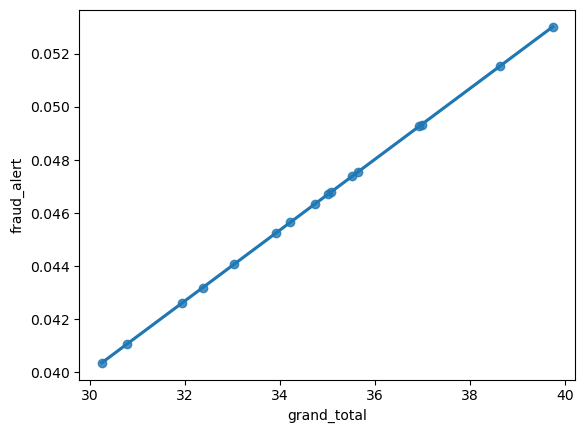

In [162]:
#linear regression with trendline.
sns.regplot(x='grand_total', y="fraud_alert", data=df, ci=None)
plt.show()

In [163]:
from statsmodels.formula.api import ols
#create the model object
mdl_fraud_vs_grand = ols("fraud_alert~grand_total", data = df)
mdl_fraud_vs_grand 

In [164]:
## fit the new created model** mdl_fraud_vs_grand***
mdl_fraud_vs_grand= mdl_fraud_vs_grand.fit()
## calculate intercept & slope
print(mdl_fraud_vs_grand.params)

Intercept      2.685560e-10
grand_total    1.334205e-03
dtype: float64


## Categorical Explanatory variables 


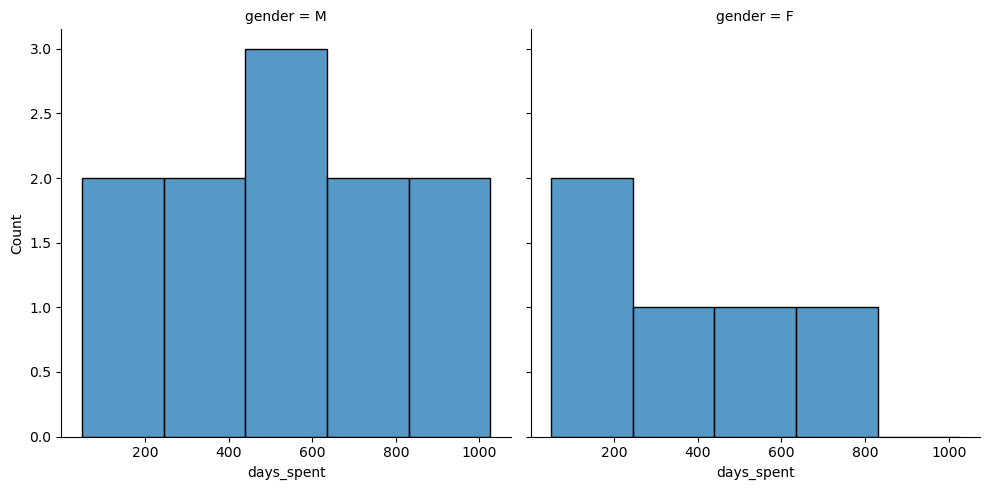

In [165]:
sns.displot(data=df, x='days_spent', col='gender', col_wrap=2, bins=5)
plt.show()

In [166]:
## Calculating differences in average days spent in the program for M & W
summary_stats=df.groupby("gender")["days_spent"].mean()
summary_stats

gender
F    386.400000
M    496.545455
Name: days_spent, dtype: float64

In [167]:
from statsmodels.formula.api import ols
mdl_fraud_vs_gender = ols("days_spent~gender + 0", data=df).fit()
print(mdl_fraud_vs_gender.params)

gender[F]    386.400000
gender[M]    496.545455
dtype: float64


#####  Males tend to stay longer in the program then Female

## Making Predictions 

In [168]:
bad_peeps=df[df["Category"]=="Bad"]
bad_peeps

,Youth ID,gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,Category,result_score,fraud_alert,row_std
2,3,M,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,49,Bad,0,0.046711,0.325793
4,5,F,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,241,Bad,0,0.049339,0.525622
5,6,M,4.50,4.59,4.65,4.83,4.09,4.35,3.89,4.62,35.52,495,Bad,0,0.047391,0.313460
7,8,M,5.00,4.67,4.94,5.00,4.40,4.84,4.78,5.00,38.63,184,Bad,0,0.051540,0.211081
9,10,F,4.75,4.41,4.29,4.94,3.78,3.95,3.22,4.88,34.22,476,Bad,0,0.045656,0.599518
11,12,M,4.55,4.88,4.71,4.83,4.09,4.55,4.44,4.88,36.93,472,Bad,0,0.049272,0.270023


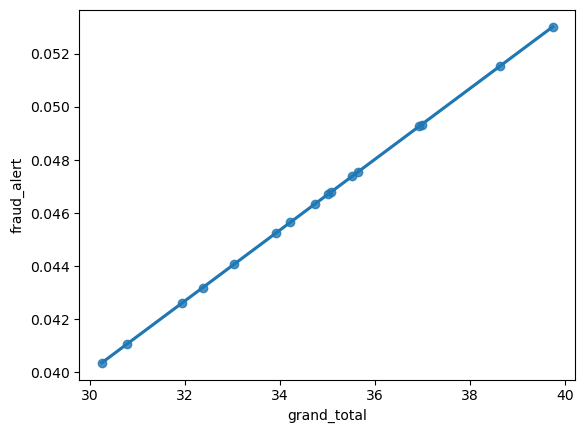

In [169]:
#scatter plot with trendline 
sns.regplot(x="grand_total", y="fraud_alert",data=df, ci=None)
plt.show()

In [170]:
#Create model and fit
mdl_fraud_vs_grand_total=ols("fraud_alert~grand_total", data=df).fit()
mdl_fraud_vs_grand_total

In [172]:
#choosing explanatory variables 
explanatory_data=pd.DataFrame({"grand_total":np.arange(-12,10)})
explanatory_data.head()

,grand_total
0,-12
1,-11
2,-10
3,-9
4,-8


In [173]:
#making predictions
print(mdl_fraud_vs_grand_total.predict(explanatory_data))

0    -1.601046e-02
1    -1.467625e-02
2    -1.334205e-02
3    -1.200784e-02
4    -1.067364e-02
5    -9.339435e-03
6    -8.005230e-03
7    -6.671025e-03
8    -5.336820e-03
9    -4.002615e-03
10   -2.668410e-03
11   -1.334205e-03
12    2.685560e-10
13    1.334205e-03
14    2.668410e-03
15    4.002615e-03
16    5.336820e-03
17    6.671025e-03
18    8.005230e-03
19    9.339435e-03
20    1.067364e-02
21    1.200785e-02
dtype: float64


#### The predict function returns a Series of predictions, one for each row of the explanatory data.

In [174]:
#create side by side analysis with explanatory data & fraud_alert predictions
prediction_data= explanatory_data.assign(fraud_alert=mdl_fraud_vs_grand_total.predict(explanatory_data))
print(prediction_data)

    grand_total   fraud_alert
0           -12 -1.601046e-02
1           -11 -1.467625e-02
2           -10 -1.334205e-02
3            -9 -1.200784e-02
4            -8 -1.067364e-02
5            -7 -9.339435e-03
6            -6 -8.005230e-03
7            -5 -6.671025e-03
8            -4 -5.336820e-03
9            -3 -4.002615e-03
10           -2 -2.668410e-03
11           -1 -1.334205e-03
12            0  2.685560e-10
13            1  1.334205e-03
14            2  2.668410e-03
15            3  4.002615e-03
16            4  5.336820e-03
17            5  6.671025e-03
18            6  8.005230e-03
19            7  9.339435e-03
20            8  1.067364e-02
21            9  1.200785e-02


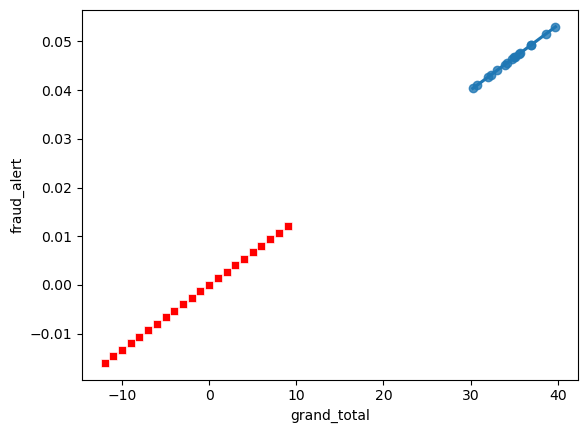

In [175]:
#visualize predictions on scatter plt with real results. 
fig=plt.figure()
sns.regplot(x="grand_total", y="fraud_alert",data=df, ci=None)
sns.scatterplot(x= "grand_total", y="fraud_alert", data=prediction_data, color='red', marker='s')
plt.show()

In [176]:
# Extrapolating with predictions outside of range
small_total=pd.DataFrame({"grand_total":[-50] })
pred_small_total=small_total.assign(fraud_alert=mdl_fraud_vs_grand_total.predict(small_total))
print(pred_small_total)

   grand_total  fraud_alert
0          -50     -0.06671


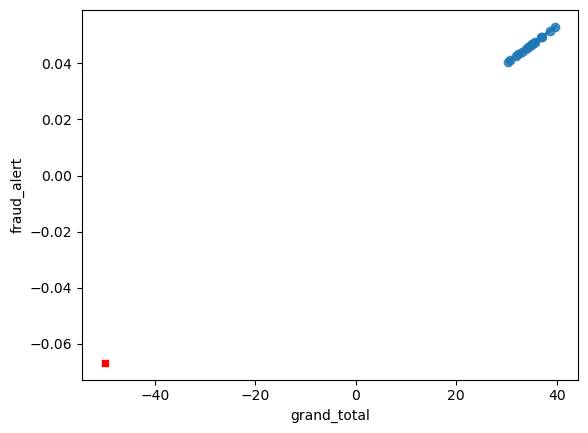

In [177]:
fig=plt.figure()
sns.regplot(x="grand_total", y="fraud_alert",data=df, ci=None)
sns.scatterplot(x= "grand_total", y="fraud_alert", data=pred_small_total, color='red', marker='s')
plt.show()

In [178]:
## Working with Model Objects with residuals. 
## Is the model of quality? 
print(mdl_fraud_vs_grand_total.resid)

0     1.378686e-10
1    -1.041442e-10
2     4.382853e-10
4    -4.253971e-10
5    -1.152568e-10
6    -3.433788e-10
7     3.131429e-10
9     3.937722e-10
10    2.713455e-10
11   -1.750499e-10
12    2.839097e-10
14    3.019678e-10
15   -2.445665e-10
16   -1.903923e-10
18   -1.597700e-10
20   -3.823356e-10
dtype: float64


In [179]:
mdl_fraud_vs_grand_total.summary()

/Users/oakmoreroadinc./anaconda3/lib/python3.10/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fraud_alert   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.959e+15
Date:                Mon, 13 May 2024   Prob (F-statistic):          2.00e-100
Time:                        11:06:11   Log-Likelihood:                 328.76
No. Observations:                  16   AIC:                            -653.5
Df Residuals:                      14   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.686e-10   1.05e-09      0.256      0.802   -1.98e-09    2.52e-09
grand_total     0.0013   3.01e-11   4.43e+07      0.000       0.001       0.001
==============================================================================
Omnibus:                        5.770   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                1.535
Skew:                           0.109   Prob(JB):                        0.464
Kurtosis:                       1.499   Cond. No.                         473.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's break down and interpret the various components of the OLS (Ordinary Least Squares) regression output you've provided and explain the calculations related to model fit and residuals. This will help you understand how well your model is performing and what the results imply about its predictive accuracy.

### OLS Regression Results Overview

1. **Dependent Variable (`fraud_alert`)**: This is the outcome or response variable that the model is trying to predict.
   
2. **R-squared (`1.000`)**: This value indicates the proportion of variance in the dependent variable that is predictable from the independent variables. An R-squared of 1.000 suggests a perfect fit, meaning that the model explains all the variability of the response data around its mean.

3. **Adjusted R-squared (`1.000`)**: Similar to R-squared but adjusted for the number of predictors in the model. It's also perfect in your case, indicating an ideal fit.

4. **F-statistic (`1.959e+15`)** and **Prob (F-statistic) (`2.00e-100`)**: These values test the null hypothesis that all regression coefficients are equal to zero. A very large F-statistic and a very small p-value (almost 0) reject this null hypothesis, suggesting that the model provides a better fit than an intercept-only model.

5. **Coefficients for `Intercept` and `grand_total`**: 
   - **Intercept (`2.686e-10`)**: Practically zero, indicating the expected value of `fraud_alert` when `grand_total` is zero.
   - **grand_total (`0.0013`)**: Indicates the increase in `fraud_alert` for every one-unit increase in `grand_total`.

6. **Standard Errors, t-values, P-values, and Confidence Intervals**: Provide statistics to assess the reliability of each coefficient estimate. The extremely small p-value for `grand_total` indicates it is a statistically significant predictor.

### Model Diagnostics

- **Omnibus, Prob(Omnibus)**: Tests the skewness and kurtosis of the residuals. A value close to zero might suggest the residuals are normally distributed, although your omnibus test indicates potential deviation from normality.

- **Durbin-Watson**: Tests for autocorrelation in the residuals of a time series. A value close to 2 suggests minimal autocorrelation.

- **Jarque-Bera (JB), Prob(JB)**: Another test of whether the residuals are normally distributed. In your output, the residuals do not appear to deviate significantly from normality.

### Additional Calculations

- **Coefficient of Determination**: Confirms that `grand_total` and `fraud_alert` are almost perfectly correlated.

- **Residual Standard Error (RSE)** and Residuals:
  - The mean squared error (MSE) and residuals you've computed indicate how much the predictions deviate from the actual values.
  - The RSE provides a measure of the quality of a linear regression fit. Lower values indicate a better fit.
  - The `NaN` values in your residuals suggest issues with the computation; it's typical due to division by zero or invalid operations.

### Interpretation
- The perfect R-squared values and significant F-statistic indicate your model fits the data exceptionally well, but it's essential to consider overfitting, especially with such a perfect fit.
- The small residuals and RSE suggest your predictions are highly accurate, with very little error on average.

In summary, while the  model shows a perfect fit, it's important to validate these results with new or out-of-sample data to ensure the model's predictive power holds up in practical scenarios and isn't just overfitting the data you have.

In [184]:
## Quantifying model fit 
# interpretation in simple linear regression
coeffr_determination=df["grand_total"].corr(df["fraud_alert"])**2
coeffr_determination

0.9999999999999929

In [185]:
#Calculate the residuale standard error 
mse=mdl_fraud_vs_grand_total.resid
print('mse:', mse)

mse: 0     1.378686e-10
1    -1.041442e-10
2     4.382853e-10
4    -4.253971e-10
5    -1.152568e-10
6    -3.433788e-10
7     3.131429e-10
9     3.937722e-10
10    2.713455e-10
11   -1.750499e-10
12    2.839097e-10
14    3.019678e-10
15   -2.445665e-10
16   -1.903923e-10
18   -1.597700e-10
20   -3.823356e-10
dtype: float64


In [186]:
rse=np.sqrt(mse)
print('res:',rse)

res: 0     0.000012
1          NaN
2     0.000021
4          NaN
5          NaN
6          NaN
7     0.000018
9     0.000020
10    0.000016
11         NaN
12    0.000017
14    0.000017
15         NaN
16         NaN
18         NaN
20         NaN
dtype: float64


In [ ]:
## Visualizing model fit 

Text(0, 0.5, 'Residuals')

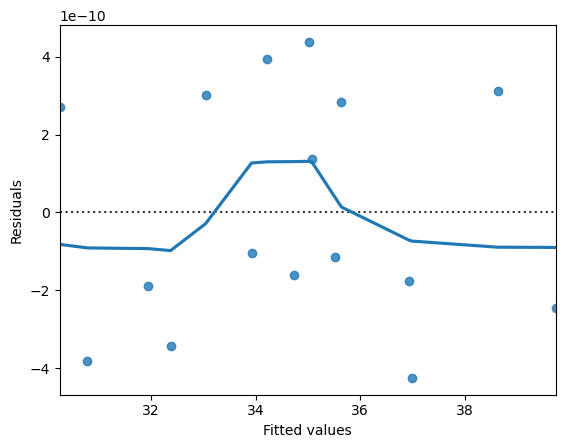

In [187]:
#Residual versus fitted plot
sns.residplot(x="grand_total", y="fraud_alert", data=df,lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

### The plot above is a good fit becasue the residuals aprox normally distributed with a mean of "0".
### In addition the lowless trend line closely follows the y=0 line, suggest the residuals are normally distributed with mean zero.


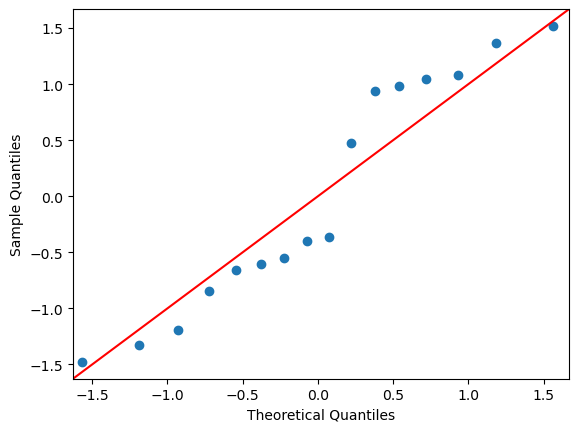

In [188]:
# Creating QQ plot 
from statsmodels.api import qqplot 
qqplot(data=mdl_fraud_vs_grand_total.resid, fit=True, line="45")
plt.show()

### For QQQ>>> Points track around a straight line indicating a good fit.

### Logistics Regression 

In [190]:
from statsmodels.formula.api import logit
mdl_result_vs_fraud_logit=logit("result_score~fraud_alert", data=df).fit()
print(mdl_result_vs_fraud_logit.params)

Optimization terminated successfully.
         Current function value: 0.541409
         Iterations 6
Intercept       16.823947
fraud_alert   -349.614562
dtype: float64


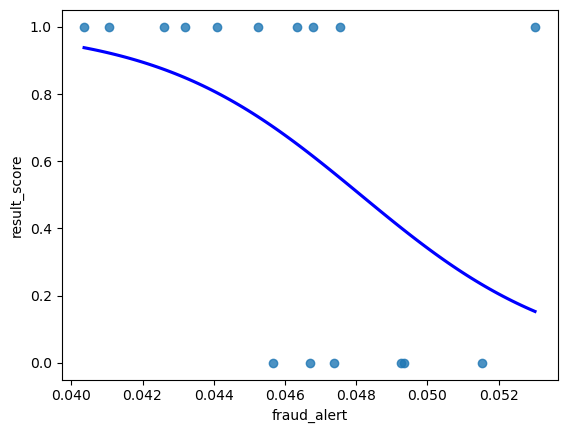

In [191]:
sns.regplot(x='fraud_alert', y='result_score', data=df, ci=None, logistic=True,
                line_kws={"color":"blue"})


plt.show()

#### To interpret this curve, when the 'fraud_alert' rises, the probability of 'result_score' gets closer to  zero, meaning the chances increase the youth discharges from the program. 
### 1=Good; 0=Bad

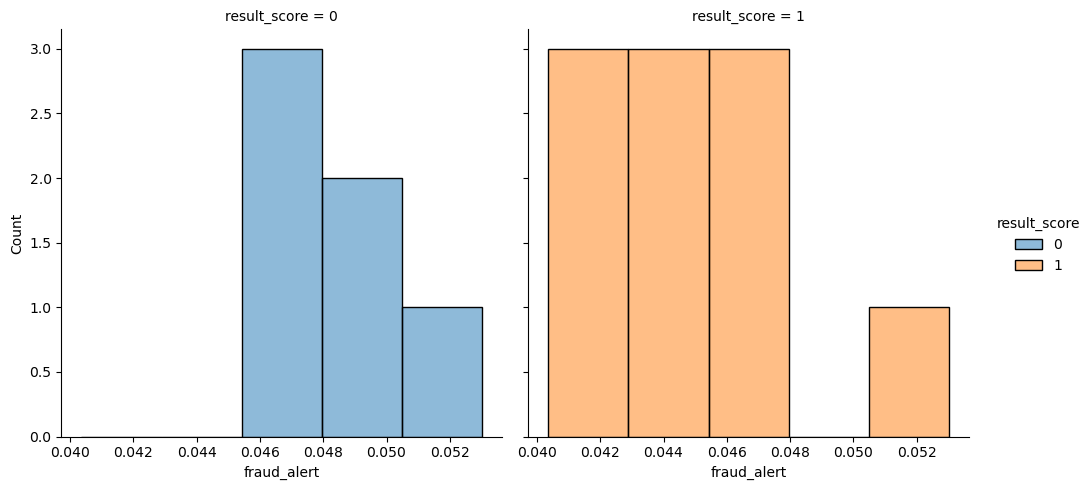

In [192]:
sns.displot(data=df,x='fraud_alert', hue='result_score', kind='hist', col='result_score')
plt.show()

### Histogram Analysis of "fraud_alert"

The histogram above displays the distribution of the explanatory variable "fraud_alert". The data for 'result_score=0' is skewed to the left, indicating that higher 'fraud_alert' values typically result in a 0, which is considered unfavorable. Conversely, the data for 'result_score=1' is slightly skewed to the right, suggesting that lower 'fraud_alert' values are associated with a score of 1, denoting a favorable outcome.

### Most Likely Outcome 

In [194]:
# Making predictions with logistic regression
mdl_fraud=logit("result_score~fraud_alert", data=df).fit()

explanatory_data=pd.DataFrame({"fraud_alert":np.arange(0.04,0.052,0.00025)})

prediction_data=explanatory_data.assign(result_score=mdl_fraud.predict(explanatory_data))

Optimization terminated successfully.
         Current function value: 0.541409
         Iterations 6


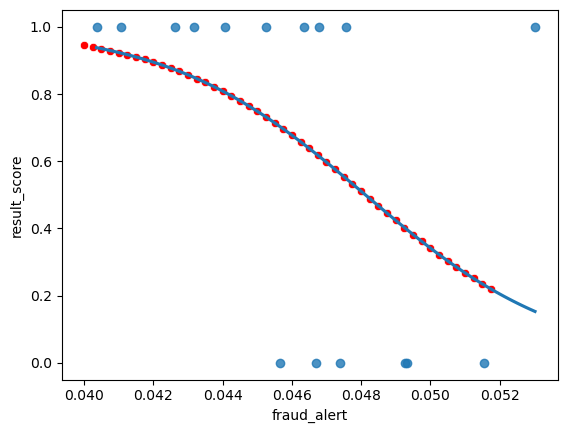

In [196]:
#Adding point predictions to a plot 
sns.regplot(x='fraud_alert', y='result_score', data=df, ci=None, logistic=True)

sns.scatterplot(x='fraud_alert',y='result_score', data=prediction_data, color="red" )


plt.show()

In [198]:
# Calculating most likely outcome
# Using numpy round() function to predict 'most likely outcome'
prediction_data = explanatory_data.assign(result_score=mdl_fraud.predict(explanatory_data))

prediction_data['most_likely_outcome']=np.round(prediction_data['result_score'])

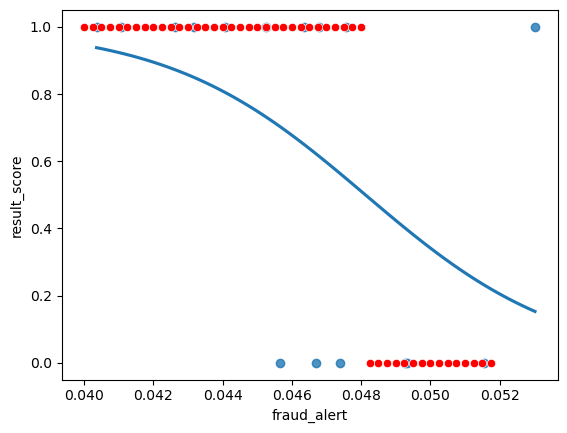

In [199]:
#visualizing most likely outcome
sns.regplot(x='fraud_alert', y='result_score', data=df, ci=None, logistic=True)

sns.scatterplot(x='fraud_alert',y='most_likely_outcome', data=prediction_data, color="red" )
plt.show()

#### Again we see as the fraud alert goes up the 'most likely outcome' is the result score approaching 0 which bad. 

In [200]:
# Calculating Odds Ratio
prediction_data['odds_ratio']=prediction_data['result_score']/(1-prediction_data['result_score'])
prediction_data['odds_ratio']

0     17.104899
1     15.673341
2     14.361595
3     13.159632
4     12.058265
5     11.049075
6     10.124346
7      9.277011
8      8.500592
9      7.789153
10     7.137257
11     6.539920
12     5.992575
13     5.491039
14     5.031479
15     4.610380
16     4.224524
17     3.870962
18     3.546990
19     3.250132
20     2.978120
21     2.728872
22     2.500485
23     2.291213
24     2.099454
25     1.923745
26     1.762741
27     1.615213
28     1.480031
29     1.356163
30     1.242662
31     1.138660
32     1.043362
33     0.956040
34     0.876027
35     0.802709
36     0.735528
37     0.673970
38     0.617563
39     0.565878
40     0.518518
41     0.475122
42     0.435357
43     0.398921
44     0.365534
45     0.334942
46     0.306909
47     0.281223
Name: odds_ratio, dtype: float64

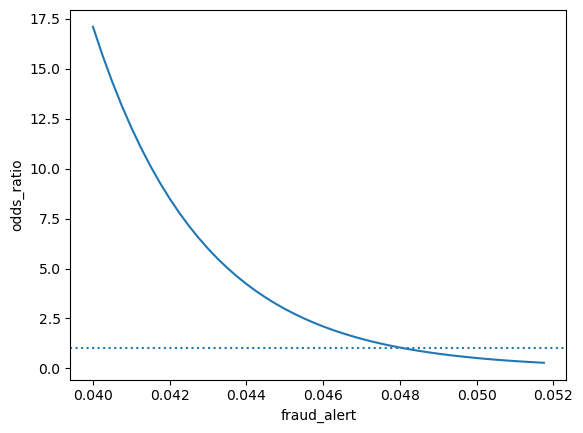

In [201]:
# Visualizing odds ratio 
sns.lineplot(x='fraud_alert',y='odds_ratio', data=prediction_data)

plt.axhline(y=1, 
           linestyle="dotted")
plt.show()

## Descriptions:
"In the bottom-right, the predictions drop below one, so the chance of 'Good=1' becomes less than the chance of 'Bad=0'."

As fraud_alert values increase, the plot shows the odds ratio decreasing below 1, indicating that "Bad=0" becomes more likely than "Good=1".
"In the top-left, the chance of 'Good=1' is about 3.5 times more than the chance of 'Bad=0'."

Initially, at lower fraud_alert values, "Good=1" is far more likely than "Bad=0", with odds ratios significantly greater than 1, reflecting much higher probabilities of positive outcomes.

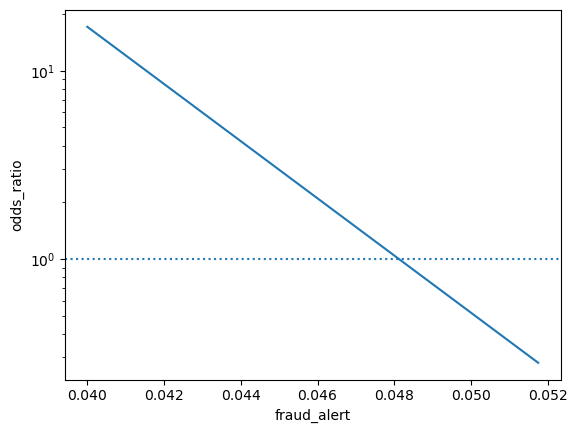

In [202]:
# Visualizing log odds ratio 

sns.lineplot(x='fraud_alert',y='odds_ratio', data=prediction_data)

plt.axhline(y=1, 
           linestyle="dotted")
plt.yscale("log")
plt.show()

In [203]:
# predicting log odds ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])
prediction_data["log_odds_ratio"]

0     2.839365
1     2.751961
2     2.664558
3     2.577154
4     2.489750
5     2.402347
6     2.314943
7     2.227539
8     2.140136
9     2.052732
10    1.965329
11    1.877925
12    1.790521
13    1.703118
14    1.615714
15    1.528310
16    1.440907
17    1.353503
18    1.266099
19    1.178696
20    1.091292
21    1.003888
22    0.916485
23    0.829081
24    0.741678
25    0.654274
26    0.566870
27    0.479467
28    0.392063
29    0.304659
30    0.217256
31    0.129852
32    0.042448
33   -0.044955
34   -0.132359
35   -0.219763
36   -0.307166
37   -0.394570
38   -0.481973
39   -0.569377
40   -0.656781
41   -0.744184
42   -0.831588
43   -0.918992
44   -1.006395
45   -1.093799
46   -1.181203
47   -1.268606
Name: log_odds_ratio, dtype: float64

### log odds ratio makes it easier to interpret when the explanatory variable is changed.

In [204]:
# Get the actual responses from the "result_score" column
actual_response = df["result_score"]

# Call the predict method on the fitted logistic regression model
# Ensure to provide it the data frame if necessary, e.g., df[['fraud_alert']] if the model uses this predictor
predicted_response = np.round(mdl_fraud.predict(df))  # Assuming the predictors are the same as those used for fitting

# Combine the actual and predicted responses in a DataFrame
outcomes = pd.DataFrame({"actual_response": actual_response, "predicted_response": predicted_response})

# Print the value counts (confusion matrix)
print(outcomes.value_counts(sort=False))


actual_response  predicted_response
0                0.0                   3
                 1.0                   3
1                0.0                   1
                 1.0                   9
dtype: int64



### Interpretation of the Confusion Matrix

Here's how to interpret this:

- **True Negatives (TN)**: 3 observations were correctly predicted as not resulting in fraud (0).
- **False Positives (FP)**: 3 observations resulted in a false alert; they were predicted as fraud (1) but were not (0).
- **False Negatives (FN)**: 1 observation was incorrectly predicted as not resulting in fraud (0) but did result in fraud (1).
- **True Positives (TP)**: 9 observations were correctly predicted as resulting in fraud (1).

### Metrics:
- **Accuracy**: How often the model predicts correctly. `(TP + TN) / Total`
- **Precision**: When it predicts fraud, how often is it correct? `TP / (TP + FP)`
- **Recall**: The ability of the model to find all the positive samples. `TP / (TP + FN)`

Given these values, you can compute additional metrics like accuracy, precision, recall, and F1-score to get a more comprehensive view of your model's performance.



In [205]:
# Visualizing the confusion matrix
conf_matrix=mdl_fraud.pred_table()
print(conf_matrix)

[[3. 3.]
 [1. 9.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.5685856432125089, 0.8305647840531561),
  ('0', '1'): (0.0,
   0.8338870431893687,
   0.5685856432125089,
   0.16611295681063118),
  ('1', '0'): (0.5735607675906184,
   0.0,
   0.42643923240938175,
   0.44296788482834987),
  ('1', '1'): (0.5735607675906184,
   0.4462901439645625,
   0.42643923240938175,
   0.5537098560354374)})

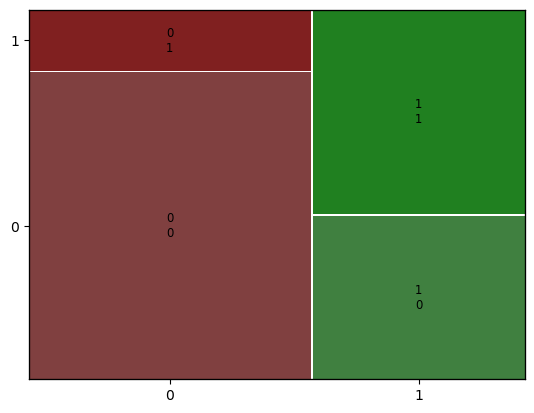

In [57]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

In [206]:
# Accuracy= represents the proportion of correct predictions (both true positives and true negatives) 
# out of all predictions made.
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

In [207]:
# Accuracy 
ac=(TN+TP)/(TN+TP+FN+FP)
print(ac)

0.75


In [208]:
#Sensitivity = identifying positive outcomes correctly
sns=TP/(FN+TP)
print(sns)

0.9


In [209]:
#Specifity = identifying negative outcomes correctly
spec= TN/(TN+FP)
print(spec)

0.5


In [211]:
df.to_csv("simple_lin_log_reg.csv")